<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/housingpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42);
square_footage = np.random.randint(500, 4000, size=100)
true_w=50
true_b=10000
noise=np.random.randn(100)*10000
prices=true_w*square_footage+true_b+noise
data = pd.DataFrame({
    'Square Footage':square_footage,
    'Price': prices
})


print(data.head())

   Square Footage          Price
0            3674  192543.517176
1            1360   74988.963044
2            1794   84914.780096
3            1630   84301.557916
4            1595   85143.612290


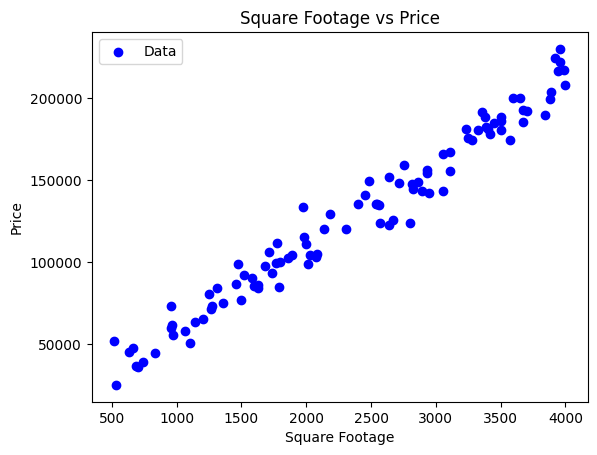

In [4]:
plt.scatter(data['Square Footage'], data['Price'], color='blue', label='Data')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square Footage vs Price')
plt.legend()
plt.show()

In [5]:
def predict(X, w, b):
    """
    Predict the house prices using the current parameters w (slope) and b (bias).
    X: Array of input features (square footage).
    w: Weight (slope).
    b: Bias (intercept).
    Returns: Array of predicted values.
    """
    return w * X + b


In [6]:
def compute_cost(X,y,w,b):
  m=len(y) #number of datapoints
  predictions=predict(X,w,b)
  cost=(1/(2*m))*np.sum((predictions-y)**2) #mean sqaured error
  return cost
    """
    Compute the Mean Squared Error cost function.
    X: Array of input features (square footage).
    y: Array of actual prices.
    w: Weight (slope).
    b: Bias (intercept).
    Returns: Cost (scalar).
    """

In [8]:

def gradient_descent(X, y, w, b, alpha, num_iterations):
    """
    Perform gradient descent to learn w and b.
    X: Array of input features (square footage).
    y: Array of actual prices.
    w: Initial value for weight (slope).
    b: Initial value for bias (intercept).
    alpha: Learning rate.
    num_iterations: Number of iterations to run gradient descent.
    Returns: Final values of w and b, history of cost function values.
    """
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Compute predictions
        predictions = predict(X, w, b)

        # Compute gradients
        w_grad = (1 / m) * np.sum((predictions - y) * X)
        b_grad = (1 / m) * np.sum(predictions - y)

        # Update w and b
        w -= alpha * w_grad
        b -= alpha * b_grad

        # Compute and store the cost after each iteration
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # Print the cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history


In [9]:
w=0
b=0
alpha=0.0000001
num_iterations=2000

final_w, final_b, cost_history=gradient_descent(data['Square Footage'], data['Price'], w, b, alpha, num_iterations)
print(f"Final weight (w): {final_w}")
print(f"Final bias (b): {final_b}")


Iteration 0: Cost = 1126538837.936957
Iteration 100: Cost = 48863749.54608181
Iteration 200: Cost = 48863734.28744116
Iteration 300: Cost = 48863719.02884776
Iteration 400: Cost = 48863703.77030159
Iteration 500: Cost = 48863688.51180267
Iteration 600: Cost = 48863673.25335094
Iteration 700: Cost = 48863657.99494647
Iteration 800: Cost = 48863642.73658925
Iteration 900: Cost = 48863627.47827922
Iteration 1000: Cost = 48863612.22001644
Iteration 1100: Cost = 48863596.96180089
Iteration 1200: Cost = 48863581.7036326
Iteration 1300: Cost = 48863566.445511505
Iteration 1400: Cost = 48863551.18743767
Iteration 1500: Cost = 48863535.92941106
Iteration 1600: Cost = 48863520.671431646
Iteration 1700: Cost = 48863505.41349948
Iteration 1800: Cost = 48863490.15561454
Iteration 1900: Cost = 48863474.89777685
Final weight (w): 53.59907708685435
Final bias (b): 0.26617431484450577


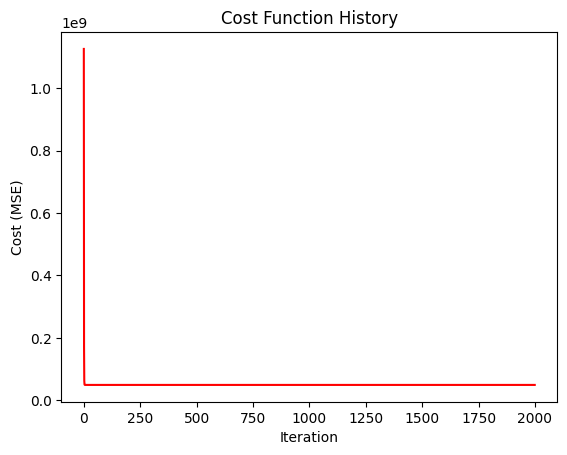

In [10]:
plt.plot(range(num_iterations), cost_history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function History')
plt.show()

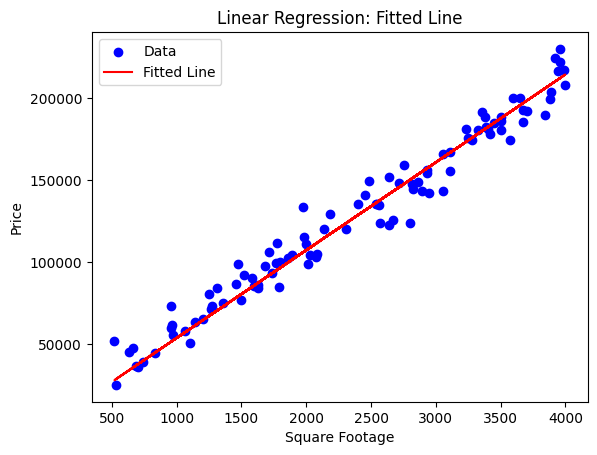

In [11]:
plt.scatter(data['Square Footage'], data['Price'], color='blue', label='Data')
plt.plot(data['Square Footage'], predict(data['Square Footage'], final_w, final_b), color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression: Fitted Line')
plt.legend()
plt.show()

Final weight (w): 53.59907708685435
Final bias (b): 0.26617431484450577


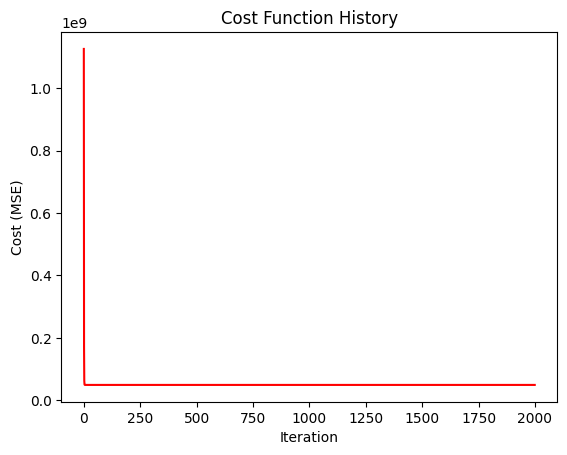

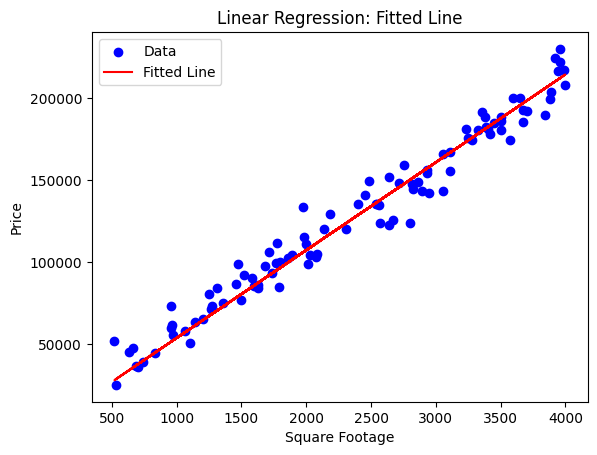

Final values:
w (Weight): 53.59907708685435
b (Bias): 0.26617431484450577


In [12]:
# Print final parameters after running gradient descent
print(f"Final weight (w): {final_w}")
print(f"Final bias (b): {final_b}")

# Plot the cost function history to see the convergence
plt.plot(range(num_iterations), cost_history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function History')
plt.show()

# Plot the data and the fitted line
plt.scatter(data['Square Footage'], data['Price'], color='blue', label='Data')
plt.plot(data['Square Footage'], predict(data['Square Footage'], final_w, final_b), color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression: Fitted Line')
plt.legend()
plt.show()

# Print final values of weight and bias for the model
print(f"Final values:")
print(f"w (Weight): {final_w}")
print(f"b (Bias): {final_b}")


In [13]:
# After training the model
final_w, final_b, cost_history = gradient_descent(data['Square Footage'], data['Price'], w, b, alpha, num_iterations)

# Let's predict the price for a specific square footage, for example 1500 sq. ft.
square_footage_to_predict = 1500
predicted_price = predict(square_footage_to_predict, final_w, final_b)

print(f"Predicted price for a house with {square_footage_to_predict} square feet: {predicted_price}")

# Print final values of weight and bias
print(f"Final values of the model:")
print(f"w (Weight): {final_w}")
print(f"b (Bias): {final_b}")


Iteration 0: Cost = 1126538837.936957
Iteration 100: Cost = 48863749.54608181
Iteration 200: Cost = 48863734.28744116
Iteration 300: Cost = 48863719.02884776
Iteration 400: Cost = 48863703.77030159
Iteration 500: Cost = 48863688.51180267
Iteration 600: Cost = 48863673.25335094
Iteration 700: Cost = 48863657.99494647
Iteration 800: Cost = 48863642.73658925
Iteration 900: Cost = 48863627.47827922
Iteration 1000: Cost = 48863612.22001644
Iteration 1100: Cost = 48863596.96180089
Iteration 1200: Cost = 48863581.7036326
Iteration 1300: Cost = 48863566.445511505
Iteration 1400: Cost = 48863551.18743767
Iteration 1500: Cost = 48863535.92941106
Iteration 1600: Cost = 48863520.671431646
Iteration 1700: Cost = 48863505.41349948
Iteration 1800: Cost = 48863490.15561454
Iteration 1900: Cost = 48863474.89777685
Predicted price for a house with 1500 square feet: 80398.88180459637
Final values of the model:
w (Weight): 53.59907708685435
b (Bias): 0.26617431484450577


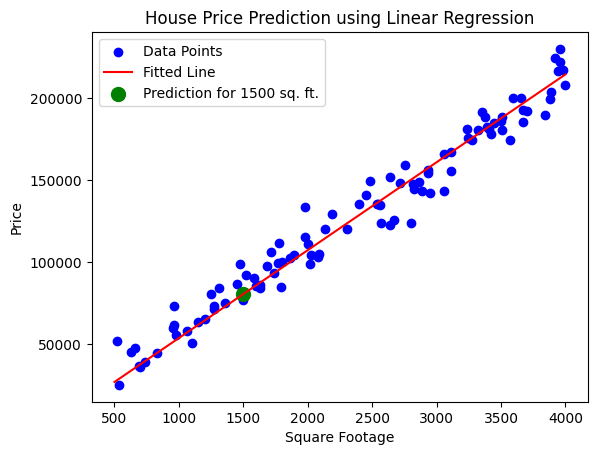

In [14]:
plt.scatter(data['Square Footage'], data['Price'], color='blue', label='Data Points')

# Plot the linear regression line
square_footage_range = np.linspace(500, 4000, 100)  # Generate a range of square footage values for plotting
predicted_prices_range = predict(square_footage_range, final_w, final_b)
plt.plot(square_footage_range, predicted_prices_range, color='red', label='Fitted Line')

# Highlight the predicted point for square footage 1500
plt.scatter(square_footage_to_predict, predicted_price, color='green', marker='o', s=100, label=f'Prediction for {square_footage_to_predict} sq. ft.')

# Add labels, title, and legend
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Price Prediction using Linear Regression')
plt.legend()

# Show the plot
plt.show()